In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tools import add_constant 

In [7]:
# initialize data of lists.
data = {'Y': ['78.5', '74.3', '104.3', '87.6','95.9'],
        'X1': [7, 1, 11,11, 7],
        'X2':[26,29,56,31,52],
        'X3':[6,15,8,8,6],
        'X4':[60,52,20,47,33]}

# Create DataFrame
df = pd.DataFrame(data)

print(df)

       Y  X1  X2  X3  X4
0   78.5   7  26   6  60
1   74.3   1  29  15  52
2  104.3  11  56   8  20
3   87.6  11  31   8  47
4   95.9   7  52   6  33


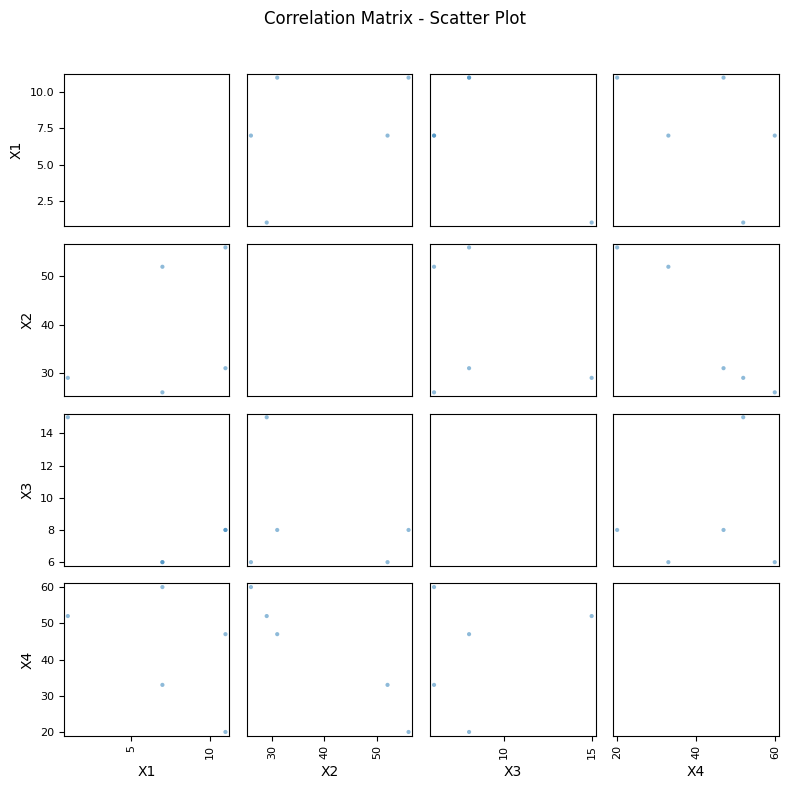

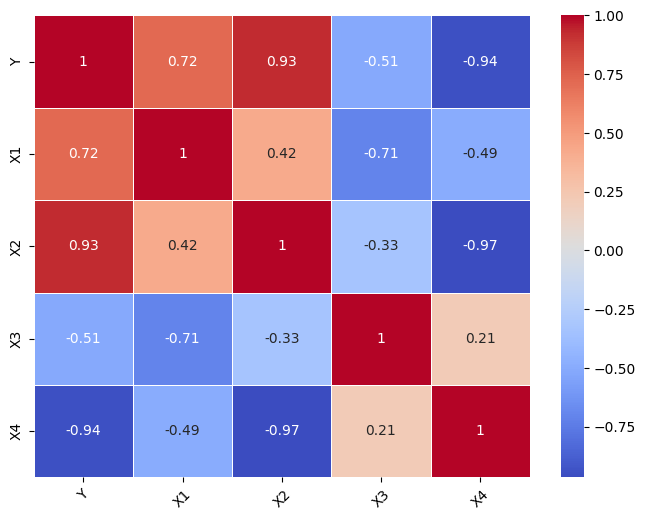

In [12]:
cor_matrix = df.corr()

pd.plotting.scatter_matrix(df,figsize=(8,8),diagonal='none')
plt.suptitle('Correlation Matrix - Scatter Plot')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

#Heat map version

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',linewidths=0.5,ax=ax)
plt.xticks(rotation=45)
plt.show()


In [31]:
from statsmodels.stat.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Predictor"] =  X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
print(vif)

ModuleNotFoundError: No module named 'statsmodels.stat'

In [32]:

# Define the regression equation coefficients
intercept = 52.58
coef_x1 = 1.468
coef_x2 = 0.6623

# Define the target value, lower spec, and upper spec for y
target_y = 95.4
lower_spec = 91.6
upper_spec = 99.2

# Define the mean and standard deviation for X1 and X2
mean_x1 = 7.5
std_x1 = 0.6
mean_x2 = 48
std_x2 = 1.3

# Set the number of iterations for the Monte Carlo simulation
num_iterations = 1000000

# Initialize array to store the simulated y values
simulated_y = np.zeros(num_iterations)

# Perform the Monte Carlo simulation
for i in range(num_iterations):
    # Generate random samples for X1 and X2
    x1 = np.random.normal(mean_x1, std_x1)
    x2 = np.random.normal(mean_x2, std_x2)

    # Calculate the predicted value of y using the regression equation
    y_predicted = intercept + coef_x1 * x1 + coef_x2 * x2

    # Store the predicted value of y
    simulated_y[i] = y_predicted

# Calculate the mean and standard deviation of the simulated y values
mean_simulated_y = np.mean(simulated_y)
std_simulated_y = np.std(simulated_y)

# Calculate the count and percentage of out-of-specification values
out_of_spec_count = np.sum((simulated_y < lower_spec) | (simulated_y > upper_spec))
out_of_spec_percentage = out_of_spec_count / num_iterations * 100

# Calculate the process capability (Cp)
cp = (upper_spec - lower_spec) / (6 * np.std(simulated_y))

# Calculate the process centering (Cpk)
cpk = min((upper_spec - mean_simulated_y) / (3 * np.std(simulated_y)),
           (mean_simulated_y - lower_spec) / (3 * np.std(simulated_y)))

# Calculate the Process Performance Index (Ppk)
ppk = min(cp, cpk)

# Print the simulation results
print("Mean of simulated y values:", mean_simulated_y)
print("Standard deviation of simulated y values:", std_simulated_y)
print("Out-of-Specification Count:", out_of_spec_count)
print("Out-of-Specification Percentage:", out_of_spec_percentage)
print("Process Capability (Cp):", cp)
print("Process Centering (Cpk):", cpk)
print("Process Performance Index (Ppk):", ppk)

Mean of simulated y values: 95.37889287792517
Standard deviation of simulated y values: 1.2321915138269952
Out-of-Specification Count: 2011
Out-of-Specification Percentage: 0.20110000000000003
Process Capability (Cp): 1.0279787293231704
Process Centering (Cpk): 1.0222688154994457
Process Performance Index (Ppk): 1.0222688154994457


In [34]:
# Define the range of X1 and X2
x1_range = [7.3, 7.7]
x2_range = [47.8, 48.2]

# Set the number of iterations for the Monte Carlo simulation
num_iterations = 1000000

def calculate_cpk(mean_y, std_y):
    cp = (upper_spec - lower_spec) / (6 * std_y)
    cpk = min((upper_spec - mean_y) / (3 * std_y),
              (mean_y - lower_spec) / (3 * std_y))
    return cpk

# Initialize variables to store the highest Cpk and its corresponding X1 and X2
highest_cpk = 0.0
best_x1 = 0.0
best_x2 = 0.0

# Perform Monte Carlo Simulation
for i in range(num_iterations):
    # Generate random samples for X1 and X2 within the specified range
    x1 = np.random.uniform(*x1_range)
    x2 = np.random.uniform(*x2_range)

    # Calculate the predicted value of y using the regression equation
    y_predicted = intercept + coef_x1 * x1 + coef_x2 * x2

    # Calculate the standard deviation of y assuming a normal distribution
    std_y = (upper_spec - lower_spec) / (6 * np.sqrt(3))

    # Calculate the Cpk value for the simulated mean value of y
    cpk = calculate_cpk(y_predicted, std_y)

    # Update the highest Cpk and its corresponding X1 and X2 if necessary
    if cpk > highest_cpk:
        highest_cpk = cpk
        optimized_x1 = x1
        optimized_x2 = x2

# Calculate additional values based on the highest Cpk, optimized X1, and optimized X2
mean_simulated_y = intercept + coef_x1 * optimized_x1 + coef_x2 * optimized_x2
std_simulated_y = (upper_spec - lower_spec) / (6 * np.sqrt(3))
out_of_spec_count = np.sum((simulated_y < lower_spec) | (simulated_y > upper_spec))
out_of_spec_percentage = out_of_spec_count / num_iterations * 100
cp = (upper_spec - lower_spec) / (6 * std_simulated_y)
ppk = min(cp, highest_cpk)

# # Print the highest Cpk value and its corresponding X1 and X2
print("Highest Cpk value:", highest_cpk)
print("Optimized X1 value:", optimized_x1)
print("Optimized X2 value:", optimized_x2)
# Print the optimized results
print("Optimized Results:")
print("Mean of simulated y values:", mean_simulated_y)
print("Standard deviation of simulated y values:", std_simulated_y)
print("Out-of-Specification Count:", out_of_spec_count)
print("Out-of-Specification Percentage:", out_of_spec_percentage)
print("Process Capability (Cp):", cp)
print("Process Capability Index (Cpk):", highest_cpk)
print("Process Performance Index (Ppk):", ppk)

Highest Cpk value: 1.7320507223134562
Optimized X1 value: 7.590929946482087
Optimized X2 value: 47.828046241293684
Optimized Results:
Mean of simulated y values: 95.40000018704451
Standard deviation of simulated y values: 0.7313103409735268
Out-of-Specification Count: 2011
Out-of-Specification Percentage: 0.20110000000000003
Process Capability (Cp): 1.7320508075688774
Process Capability Index (Cpk): 1.7320507223134562
Process Performance Index (Ppk): 1.7320507223134562


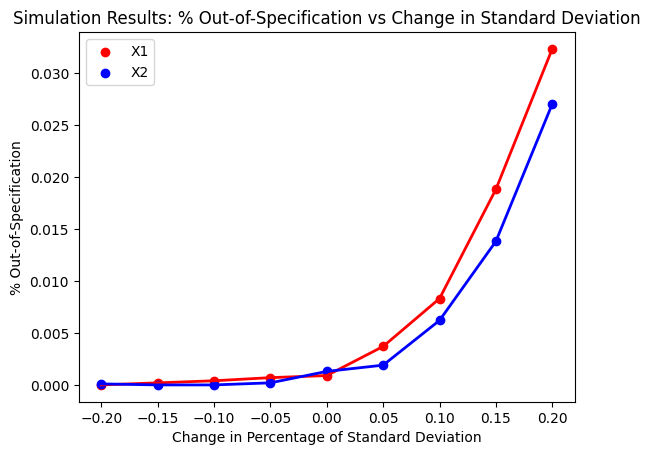

In [36]:
#Define the range of percentage changes for standard deviations
percentage_changes = np.linspace(-0.20, 0.20, num=9)

# Initialize lists to store the out-of-specification percentages for X1 and X2
out_of_spec_percentage_x1 = []
out_of_spec_percentage_x2 = []

# Perform the Monte Carlo simulation for different standard deviations of X1 while holding X2 constant
for percentage_change in percentage_changes:
    # Calculate the adjusted standard deviation for X1
    std_x1_adjusted = std_x1 * (1 + percentage_change)

    # Initialize counter for out-of-specification instances
    out_of_spec_count_x1 = 0

    # Perform the Monte Carlo simulation
    for i in range(num_iterations):
        # Generate random sample for X1 with fixed values
        x1 = np.random.normal(mean_x1, std_x1_adjusted)

        # Calculate the predicted value of y using the regression equation
        y_predicted = intercept + coef_x1 * x1 + coef_x2 * mean_x2

        # Check if the predicted value of y is out of specification for X1
        if y_predicted < lower_spec or y_predicted > upper_spec:
            out_of_spec_count_x1 += 1

    # Calculate the percentage out-of-specification for X1
    out_of_spec_percentage_x1.append((out_of_spec_count_x1 / num_iterations) * 100)

# Perform the Monte Carlo simulation for different standard deviations of X2 while holding X1 constant
for percentage_change in percentage_changes:
    # Calculate the adjusted standard deviation for X2
    std_x2_adjusted = std_x2 * (1 + percentage_change)

    # Initialize counter for out-of-specification instances
    out_of_spec_count_x2 = 0

    # Perform the Monte Carlo simulation
    for i in range(num_iterations):
        # Generate random sample for X2 with fixed values
        x2 = np.random.normal(mean_x2, std_x2_adjusted)

        # Calculate the predicted value of y using the regression equation
        y_predicted = intercept + coef_x1 * mean_x1 + coef_x2 * x2

        # Check if the predicted value of y is out of specification for X2
        if y_predicted < lower_spec or y_predicted > upper_spec:
            out_of_spec_count_x2 += 1

    # Calculate the percentage out-of-specification for X2
    out_of_spec_percentage_x2.append((out_of_spec_count_x2 / num_iterations) * 100)

# Plot the scatterplot for both X1 and X2 simulations
plt.scatter(percentage_changes, out_of_spec_percentage_x1, color='red', label='X1')
plt.plot(percentage_changes, out_of_spec_percentage_x1, color='red', linestyle='-', linewidth=2)
plt.scatter(percentage_changes, out_of_spec_percentage_x2, color='blue', label='X2')
plt.plot(percentage_changes, out_of_spec_percentage_x2, color='blue', linestyle='-', linewidth=2)

plt.xlabel("Change in Percentage of Standard Deviation")
plt.ylabel("% Out-of-Specification")
plt.title("Simulation Results: % Out-of-Specification vs Change in Standard Deviation")
plt.legend()
plt.show()